# AMS 561 Assignment 6: Machine Learning

We will use Scikit-Learn library to perform machine learning on some data in problems 1-3.

In [1]:
from sklearn import datasets
from sklearn import model_selection   
from sklearn import linear_model
from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(555)  

## Problem 1: Machine Learning - Classification
In problems 1 and 2, we will work with the optical recognition of handwritten digits data. First, let's load this data from Scikit-Learn datasets:

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [4]:
print(digits.images.shape)

(1797, 8, 8)


As you can see, this dataset has a similar dictionary structure including keys:
- `DESCR`  : describes the dataset
- `images` : it's a three-dimensional array ( 1,797 samples, each consisting of a 8x8 grid of pixels)
- `data` : contains an array with one row per sample and one column per feature
- `target`: contains an array with labels  

Let's visualize the digits data. The code below plots the first 100 images with the corresponding labels in green.

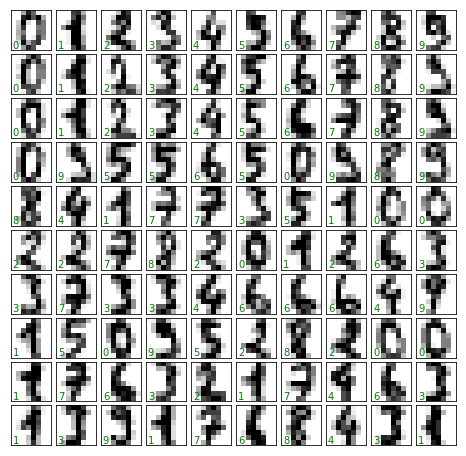

In [5]:
# plot the digits: each image is 8x8 pixels
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

We will assign the features data to X and the target (labels) to y:  

In [6]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


Note that there are 1,797 samples and 64 features.

1) Split the data into a training set (with 70% of the data) and a testing set. Name the variables `X_train, X_test, y_train, y_test`.  Display the size of `X_train`.

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(digits.data, digits.target, train_size = 0.7)

C:\python\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
print(X_train.shape)

(1257, 64)


We will apply different classification algorithms to the digits data.
- random forest method
- decision trees
- support-vector machine with linear kernel 

2) Classify the digits using the decision trees classifer. (Perform the "training" on the training set and make a prediction on the testing set (`X_test`) )

In [9]:
# your code:
# decision trees 
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)
print(y_test_pred)

[4 2 3 2 0 6 7 3 1 4 4 3 2 6 8 5 9 9 8 6 1 6 8 0 0 2 3 2 0 2 1 6 0 3 9 5 4
 2 8 0 3 6 4 9 2 5 0 6 8 2 8 2 1 8 4 9 8 5 4 2 2 6 3 1 7 3 2 4 1 9 6 5 2 8
 6 1 2 9 6 3 3 9 6 2 3 0 1 1 4 8 0 3 5 0 6 8 9 5 4 6 1 9 6 3 4 4 8 8 5 5 7
 6 1 5 0 2 2 4 2 0 5 4 8 1 8 9 4 3 4 6 4 9 4 4 4 4 9 3 1 0 4 4 5 7 1 2 1 0
 1 7 5 2 2 9 3 3 2 9 6 7 9 2 9 6 0 2 3 6 5 8 3 4 6 9 9 1 6 2 6 5 4 3 8 5 7
 0 3 7 0 8 7 2 7 1 7 9 2 4 3 6 1 3 0 5 4 9 1 6 4 1 9 7 7 5 9 0 5 8 7 5 4 0
 1 5 4 2 1 0 4 8 3 8 4 7 4 0 7 8 1 0 9 9 4 6 5 7 7 3 7 2 0 9 0 5 8 6 3 1 6
 8 7 8 8 6 5 1 7 6 9 0 7 1 4 3 6 6 8 0 9 9 8 2 2 2 2 6 6 9 1 5 2 8 4 9 8 0
 5 9 2 4 8 8 0 0 6 0 0 0 9 6 2 1 0 5 8 1 1 3 7 9 9 4 6 2 0 3 4 2 5 1 1 2 1
 3 8 3 4 9 3 8 6 9 1 6 3 1 9 8 9 5 1 4 4 6 2 2 0 0 4 3 4 9 8 5 8 5 8 8 0 7
 5 9 0 0 1 3 4 2 3 0 5 0 4 7 8 4 3 1 9 9 3 5 9 4 4 6 2 6 4 1 0 1 6 6 9 6 9
 5 1 8 2 9 6 7 5 2 5 8 6 5 3 5 0 0 4 9 7 7 4 1 8 4 7 7 8 7 5 0 8 4 6 9 8 4
 7 1 9 7 6 3 5 9 2 4 9 9 4 2 0 9 2 7 5 6 3 7 7 1 8 5 2 9 6 4 5 1 8 6 7 4 7
 4 1 4 3 5 9 9 9 9 3 6 5 

3) Display the classification report for this classifier.

In [10]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.75      0.84      0.79        45
           2       0.88      0.91      0.89        55
           3       0.82      0.79      0.80        52
           4       0.80      0.93      0.86        57
           5       0.83      0.89      0.86        45
           6       0.98      0.96      0.97        57
           7       0.93      0.77      0.85        53
           8       0.79      0.71      0.75        59
           9       0.83      0.84      0.83        63

   micro avg       0.86      0.86      0.86       540
   macro avg       0.86      0.86      0.86       540
weighted avg       0.86      0.86      0.86       540



4) Compute the "accuracy score" (`metrics.accuracy_score`) of the prediction on the testing set. The documentation is [here](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) (Use only the first two arguments (`y_true` and `y_pred`) and leave everything else default).

In [11]:
metrics.accuracy_score(y_test, y_test_pred, normalize = True)

0.8574074074074074

5) Compute the confusion matrix for this classifier. Display the result.

In [12]:
import pandas as pd
print(metrics.confusion_matrix(y_test, y_test_pred))
#metrics.confusion_matrix(y_test, y_test_pred, normalize = False)
pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

[[50  0  1  0  1  1  0  0  0  1]
 [ 0 38  1  2  1  0  0  1  2  0]
 [ 0  1 50  0  0  1  0  0  2  1]
 [ 0  0  1 41  0  1  1  0  5  3]
 [ 0  1  0  0 53  1  0  0  1  1]
 [ 0  0  0  3  0 40  0  0  1  1]
 [ 0  2  0  0  0  0 55  0  0  0]
 [ 0  1  1  0  7  0  0 41  0  3]
 [ 0  6  2  3  3  1  0  1 42  1]
 [ 1  2  1  1  1  3  0  1  0 53]]


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,50,0,1,0,1,1,0,0,0,1,54
1,0,38,1,2,1,0,0,1,2,0,45
2,0,1,50,0,0,1,0,0,2,1,55
3,0,0,1,41,0,1,1,0,5,3,52
4,0,1,0,0,53,1,0,0,1,1,57
5,0,0,0,3,0,40,0,0,1,1,45
6,0,2,0,0,0,0,55,0,0,0,57
7,0,1,1,0,7,0,0,41,0,3,53
8,0,6,2,3,3,1,0,1,42,1,59


6) From the confusion matrix, answer the following questions:
- Is there any digit that was 100% correctly predicted?  If yes, what is it?
Ans:- No digit was 100% correctly predicted
- How many samples of digit 8 were categorized as digit 1 ?
Ans:- 2 samples of digit 8 were categorized as digit 1
- What is the largest number of samples that were incorrectly classified?  What digit is it? 
Ans:- 6 samples. The number 1 was incorrectly categorized as digit 8 6 times.

7) Use the random forest classifer to perform the same task. 
- Perform the "training" on the training set and make a prediction on the testing set (`X_test`)
- Compute the "accuracy score"
- Display the confusion matrix

In [13]:
classifier = ensemble.RandomForestClassifier()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

print(metrics.accuracy_score(y_test, y_test_pred, normalize = True))
print(metrics.confusion_matrix(y_test, y_test_pred))

0.9444444444444444
[[54  0  0  0  0  0  0  0  0  0]
 [ 0 45  0  0  0  0  0  0  0  0]
 [ 0  2 52  0  0  0  0  0  1  0]
 [ 0  0  0 51  0  0  0  0  1  0]
 [ 0  0  0  0 57  0  0  0  0  0]
 [ 0  2  0  1  1 40  0  0  0  1]
 [ 0  1  0  0  0  0 55  0  1  0]
 [ 0  0  0  0  0  0  0 52  1  0]
 [ 0  6  0  3  0  1  0  0 49  0]
 [ 0  0  0  0  0  4  0  1  3 55]]


C:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


8) Use the support-vector machine (with 'linear' kernel) as the classifer.
- Perform the "training" on the training set and make a prediction on the testing set (`X_test`)
- Compute the "accuracy score"
- Display the confusion matrix

In [14]:
classifier = svm.SVC()
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

print(metrics.accuracy_score(y_test, y_test_pred, normalize = True))
print(metrics.confusion_matrix(y_test, y_test_pred))

C:\python\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.32407407407407407
[[20  0  0  0  0 34  0  0  0  0]
 [ 0 22  0  0  0 23  0  0  0  0]
 [ 0  0  7  0  0 48  0  0  0  0]
 [ 0  0  0 21  0 31  0  0  0  0]
 [ 0  0  0  0 17 40  0  0  0  0]
 [ 0  0  0  0  0 45  0  0  0  0]
 [ 0  0  0  0  0 30 27  0  0  0]
 [ 0  0  0  0  0 38  0 15  0  0]
 [ 0  0  0  0  0 58  0  0  1  0]
 [ 0  0  0  0  0 63  0  0  0  0]]


9) Among these three classifiers, which one do you think does the best job at classifying digits?  Why?

answer: Of the above 3 classifiers, Random Forest Classifier does the best job since it has the highest accuracy score

## Problem 2: Machine Learning - Clustering
We will still consider the handwritten digits data. (Note that we have saved the feature data in the variable `X` (we are not splitting the data into a training set and a testing set)).  We will try to identify similar digits without using the original label data (`y`). 

1) Perform K-means method on the data `X` and assign the prediction to the variable name `y_pred`

In [15]:
#insert your code here

X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

clustering = cluster.KMeans()
clustering.fit(X)
y_pred = clustering.predict(X)


(1797, 64)
(1797,)


In [16]:
y_pred[::50]

array([2, 4, 0, 2, 4, 0, 1, 1, 0, 0, 6, 5, 7, 0, 4, 5, 0, 3, 0, 6, 7, 4,
       3, 6, 1, 4, 6, 6, 6, 6, 6, 3, 7, 3, 3, 6])

In [17]:
y[::50]

array([0, 2, 4, 0, 1, 4, 7, 7, 4, 4, 8, 6, 2, 4, 2, 6, 4, 5, 4, 3, 1, 1,
       9, 8, 7, 1, 3, 3, 2, 5, 1, 5, 2, 5, 5, 3])

2) If you print out `y_pred` and `y` (the correct labels), you will see that although the label names don't match. Run the cell below to rename the elements in y_pred so that the labels match. 

In [18]:
from scipy.stats import mode
y_pred_labels = np.zeros_like(y_pred)
for i in range(10):
    mask = (y_pred==i)
    y_pred_labels[mask] = mode(y[mask])[0]

In [19]:
y_pred_labels[::50]

array([0, 1, 4, 0, 1, 4, 7, 7, 4, 4, 3, 6, 2, 4, 1, 6, 4, 5, 4, 3, 2, 1,
       5, 3, 7, 1, 3, 3, 3, 3, 3, 5, 2, 5, 5, 3])

In [20]:
y[::50]

array([0, 2, 4, 0, 1, 4, 7, 7, 4, 4, 8, 6, 2, 4, 2, 6, 4, 5, 4, 3, 1, 1,
       9, 8, 7, 1, 3, 3, 2, 5, 1, 5, 2, 5, 5, 3])

3) Print out the classification report and the accuracy score.

In [21]:
print(metrics.classification_report(y, y_pred))

print(metrics.accuracy_score(y_pred, y, normalize = True))

              precision    recall  f1-score   support

           0       0.01      0.01      0.01       178
           1       0.00      0.00      0.00       182
           2       0.01      0.01      0.01       177
           3       0.01      0.01      0.01       183
           4       0.01      0.01      0.01       181
           5       0.01      0.01      0.01       182
           6       0.00      0.00      0.00       181
           7       0.00      0.00      0.00       179
           8       0.00      0.00      0.00       174
           9       0.00      0.00      0.00       180

   micro avg       0.00      0.00      0.00      1797
   macro avg       0.00      0.00      0.00      1797
weighted avg       0.00      0.00      0.00      1797

0.0038953811908736783


C:\python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\python\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


4) Print out the confusion matrix

In [22]:
print(metrics.confusion_matrix(y, y_pred))

[[  1   0 177   0   0   0   0   0   0   0]
 [  0   0   0   1 132   2  22  25   0   0]
 [  0   2   1   0  11   0  12 151   0   0]
 [  0   8   0   1   8   0 163   3   0   0]
 [169  10   0   0   2   0   0   0   0   0]
 [  2   0   0 139   0   2  39   0   0   0]
 [  0   0   1   0   4 176   0   0   0   0]
 [  1 171   0   5   2   0   0   0   0   0]
 [  0   3   1   7 110   2  47   4   0   0]
 [  6   8   0   8   4   0 154   0   0   0]]


5) Which pair of digits is the most confusion? (In other words, which digit was incorrectly classified the most? (and classified as what digit?) )

In [ ]:
Answer:- The pair of digits wiht the most confusion are 2 and 0. The number 2 was incorrectly classified as digit 0 177 times.

## Problem 3: Machine Learning - Regression
We will explore the Housing Dataset which has information about houses in the suburbs of Boston.  The data were collected by D. Harrison and D.L. Rubinfeld in 1978. First, let's download this dataset. 

In [23]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'housing/housing.data',
                 header=None,
                 sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Here is what each column name represents:
1. CRIM  =    per capita crime rate by town
2. ZN    =    proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS  =   proportion of non-retail business acres per town
4. CHAS =     Charles River dummy variable (= 1 if tract bounds  river; 0 otherwise)
5. NOX  =    nitric oxides concentration (parts per 10 million)
6. RM   =    average number of rooms per dwelling
7. AGE  =    proportion of owner-occupied units built prior to 1940
8. DIS  =    weighted distances to five Boston employment centres
9. RAD   =    index of accessibility to radial highways
10. TAX   =   full-value property-tax rate per \$10,000 
11. PTRATIO =  pupil-teacher ratio by town
12. B    =    1000(Bk - 0.63)^2 where Bk is the proportion of blacksby town                 
13. LSTAT =   % lower status of the population
14. MEDV =    Median value of owner-occupied homes in \$1000's

1) Run the cell below and explain what it does. What kind of information can we get from these plots? Which pair(s) of features look linearly correlated? What do the diagonal plots tell us?

C:\python\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


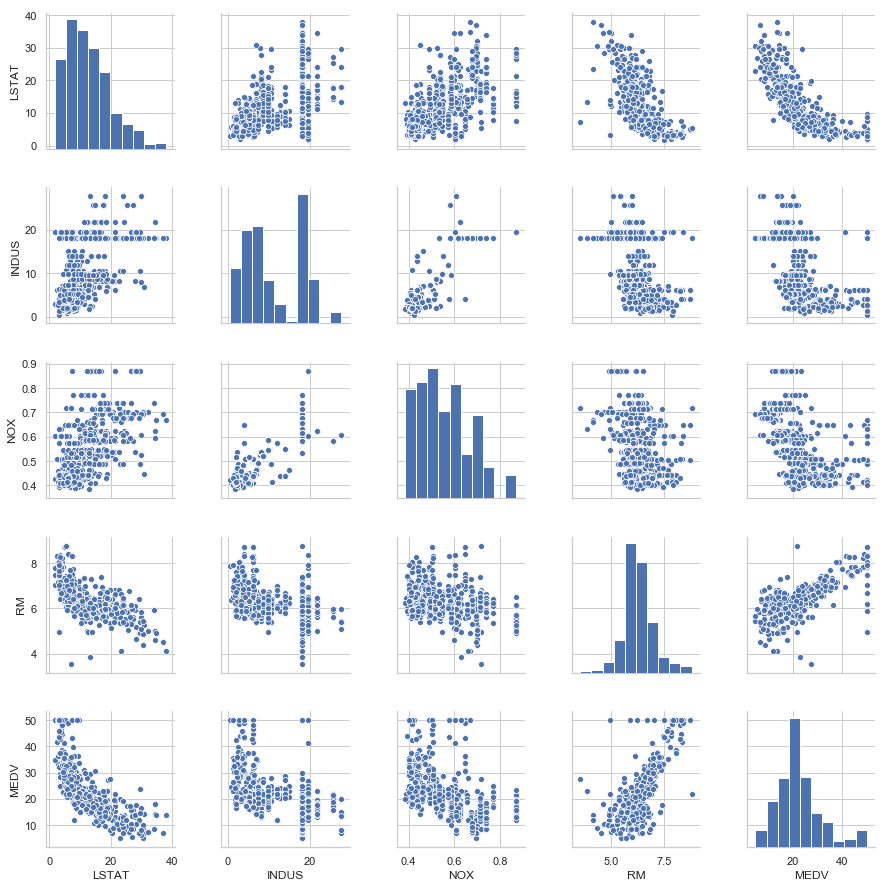

In [24]:
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

your answer: The seaborn pairplot is a data visualization library that is based on matplotlib. The above pairplot code provides              a high-level interface for drawing attractive and informative statistical graphics. 
             The diagonal plots show the univariate distribution of the data for the variable in that column.
             

We will use the `RM` variable (number of rooms) to predict `MEDV` (the housing prices). 

In [25]:
X = df[['RM']].values
y = df['MEDV'].values

from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

2) Run the cell above. Notice that we stardardize the variables. Read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and explain in your own words why we want to do that. 

The variables need to be standardized so that the machine learning algorithm does not give a random or garbage output when it comes across a varibale whose individual features are not similar to the standard normally distributed data. 

3) Do the following:
- Create a training set (70%) and a testing set (30%). 
- Fit the model to the training data with `LinearRegression()` in `linear_model`
- Print out the slope and the intercept of this linear model
- Plot the training data (scatter plot) and our fitted model (on the same training data) which is a straight line on the same plot. 


C:\python\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


-33.25852423863438
[8.85837801]


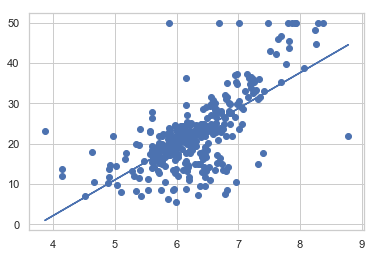

In [26]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size = 0.7)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
print(model.intercept_)
print(model.coef_)
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred)
plt.show()

4) Make another plot for the testing data, i.e., plot the testing data (scatter plot) and our prediction (a line) on the same plot. 

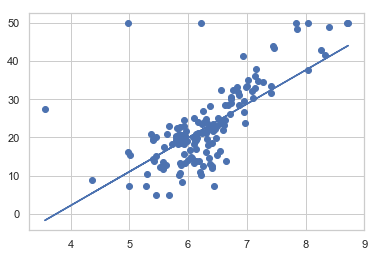

In [27]:
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.show()

## Problem 0 : Reflection & Information
1) Describe any lessons learned and challenges encountered while creating Python code and completing this assignment. (short description)

fairly understood the confusion matrix and its use in machine learning codes of python

2) Did you work alone or in group for this assignment? If you work in group, who did you work with?

alone